In [3]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\moha\Anaconda3\envs\envc\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\moha\Anaconda3\envs\envc\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\moha\Anaconda3\envs\envc\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [5]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


# Read the Data

In [6]:
df=pd.read_json('../data/dfObsV01A02.json');
df=df.sort_index();


In [7]:
df.head()

,sents,chapter,aso,entities,fner,label
0,Chapter 1,1,{'act': 'Chapter'},[],"[0, 0, 0]",0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,{'act': 'On'},[],"[0, 0, 0]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,"{'act': 'confirms', 'subject': 'testimony'}",[],"[0, 0, 0]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,"{'act': 'presumes', 'subject': 'reason', 'obj': 'this: that their gyrations are perfect circles'}",[],"[0, 0, 0]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,{'act': 'considered'},[],"[0, 0, 0]",0


In [8]:
df.tail()

,sents,chapter,aso,entities,fner,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"{'act': 'moved', 'subject': 'mars'}","[[Mars, PLAN], [opposition, ASTR], [Mars, PLAN], [Earth, PLAN], [Sun, PLAN], [17 hours 20 minutes, TIME], [Mars, PLAN], [eastward, ASTR], [16' 20"", LONG], [Sun, PLAN], [42' 18"", LONG]]","[0, 1, 1]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"{'act': 'got', 'subject': 'he', 'obj': '' 10'}","[[longitude, ASTR], [Mars, PLAN], [opposition, ASTR], [198° 37' 50"", LONG], [Mars, PLAN], [orbit, ASTR], [198° 37' 10"", LONG], [18° 37' 10"" Libra, LONG]]","[0, 0, 1]",0
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"{'act': 'moved', 'subject': 'sun'}","[[Sun, PLAN], [longitude, ASTR], [observation, ASTR], [Mars, PLAN]]","[0, 0, 0]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"{'act': 'is', 'subject': 'time'}","[[opposition, ASTR], [17 hours 20 minutes, TIME], [March 29, DATE], [observation, ASTR]]","[1, 1, 0]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"{'act': 'determined', 'subject': 'kepler', 'obj': 'the time of opposition on March 28'}","[[opposition, ASTR], [March 28, DATE], [4h 23m, TIME]]","[1, 1, 0]",0


# Distribution of Samples 

In [9]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [10]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [11]:
count

{0: 6624, 1: 75}

Text(0.5, 1.0, 'Distribution of samples over different classes')

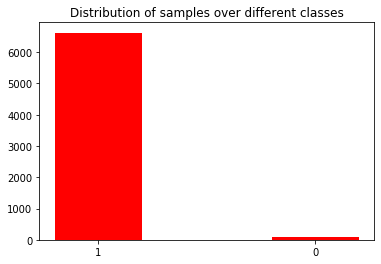

In [12]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [13]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [14]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [15]:
trial_05

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [16]:
type(df["entities"][0])

list

In [17]:
X_Obs=df.loc[df.label==1]
X_Obs=X_Obs.sents
X_Obs=list(X_Obs)


In [18]:
pd.DataFrame(X_Obs)

,0
0,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows."
1,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6."
2,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8."
3,"On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo."
4,"On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10."
...,...
70,"For while the opposition was on the night following January 30, the latitude observed on the 24th, preceding the opposition, was 4° 31', still increasing, while on January 31, 16 hours past opposition, the observed latitude was again 4° 31'."
71,"Therefore, at Hven in the year of Christ 139 May 27 at 6h the mean motion was 8s 11° 18' 30""."
72,"But on 159944 May 27 at 6h Mars's mean motion was 0s 0° 47' 30"" from the equinoctial, while the distance of Cor Leonis from that point, as demonstrated by Brahe, was 4s 24° 15' 45""."
73,"In the year of Christ 139 Pharmouthi 9, which is February 23, at sunset at 5h 30m, 3h 30m at Hven, the apparent position of the sun was computed as 3° 3' Pisces; therefore, the mean position was 0° 43' Pisces."


In [19]:
Y_Obs=df.loc[df.label==1]
Y_Obs=Y_Obs.label
Y_Obs=list(Y_Obs)

In [20]:
X_NObs=df.loc[df.label==0]
X_NObs=X_NObs.sents
X_NObs=list(X_NObs)

In [21]:
Y_NObs=df.loc[df.label==0]
Y_NObs=Y_NObs.label
Y_NObs=list(Y_NObs)

In [22]:
import random
number_of_samples = len(X_Obs)
X_NObs=random.sample(X_NObs,number_of_samples);
len(X_NObs)

75

In [23]:
number_of_samples = len(Y_Obs)
Y_NObs=random.sample(Y_NObs,number_of_samples);
len(Y_NObs)

75

In [24]:
y=Y_NObs+Y_Obs


In [25]:
X=X_NObs+X_Obs

In [26]:
category=Counter(y)
count=dict(category)

Text(0.5, 1.0, 'Distribution of samples over different classes')

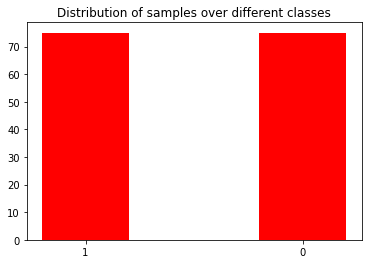

In [27]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")

In [28]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.10, random_state=42)  

## 1-SGD

In [29]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [30]:
y_pred=trial_05.predict(X_test)

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[8 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.86      1.00      0.92         6

   micro avg       0.93      0.93      0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [32]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[1.         1.         0.9375     1.         0.9375     0.85714286
 0.92857143 1.         0.92857143 1.        ]
Accuracy of : 0.959 ± 0.093


In [33]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        75
           1       0.93      0.99      0.95        75

   micro avg       0.95      0.95      0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150



In [34]:
print(cm)

[[69  1]
 [ 6 74]]


In [35]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


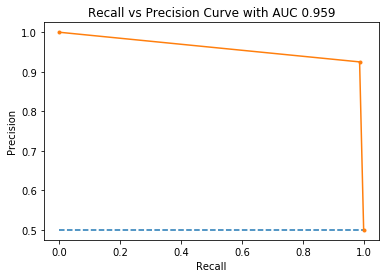

AUC: 0.959


In [36]:
plot_pr(recall, precision)

# 2- Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
trial_06=Pipeline([("vect",vec),("clf",RF)])
trial_06.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [41]:
cross_validation_accuracy(trial_06,X,y,cv=10)

[0.875      0.875      1.         1.         0.9375     0.92857143
 1.         1.         0.85714286 1.        ]
Accuracy of : 0.947 ± 0.115


In [42]:
y_pred = cross_val_predict(trial_06, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.99      0.96      0.97        75

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [43]:
print(cm)

[[74  3]
 [ 1 72]]


In [46]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


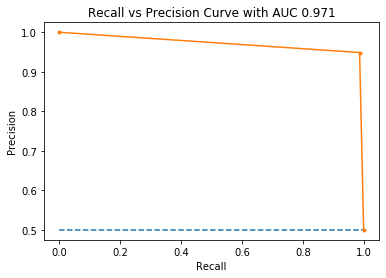

AUC: 0.971


In [47]:
plot_pr(recall, precision)

In [48]:
import pickle
saved_model = pickle.dumps(trial_06)

Pkl_Filename = "Pickle_SGD_RESAMPLED_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_05, file)

In [49]:
Pkl_Filename = "Pickle_RF_RESAMPLED_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_06, file)